# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
import tensorflow as tf
tf.random.set_seed(4)
from tensorflow import keras

# Data Collection & Pre-processing

In [3]:
heart_data = pd.read_csv('heart.csv')

In [4]:
print(heart_data)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [5]:
heart_data.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0


# Statistical info for the Dataset

In [6]:
heart_data.info()
heart_data.shape
heart_data.describe()
heart_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart_data['target'].unique()

array([0, 1], dtype=int64)

In [8]:
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

**Visualizing the Data**

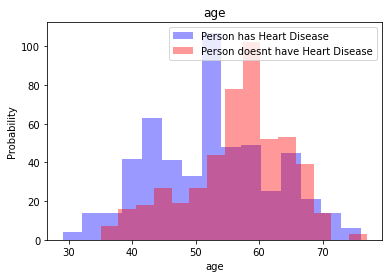

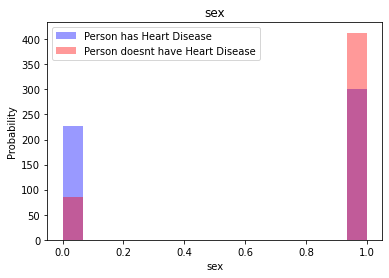

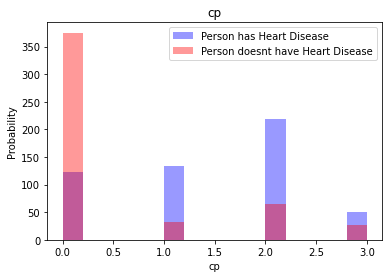

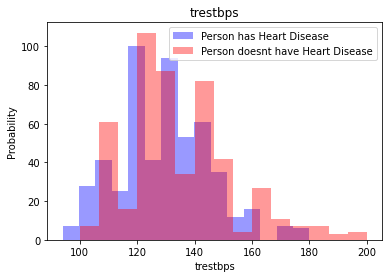

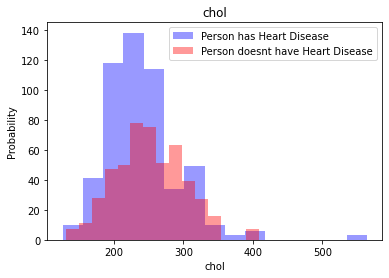

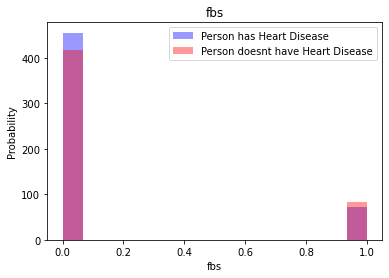

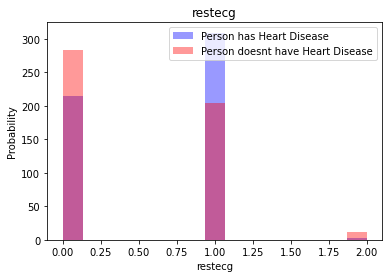

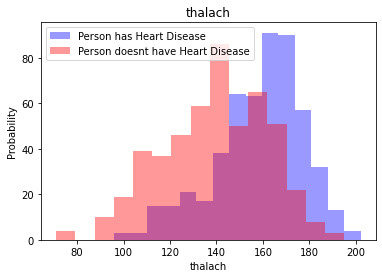

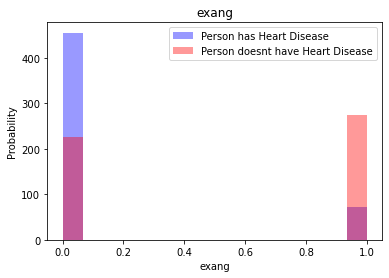

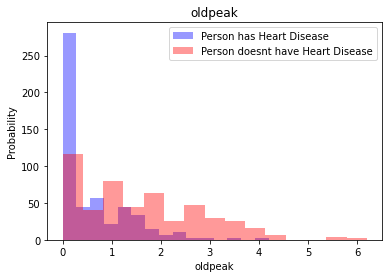

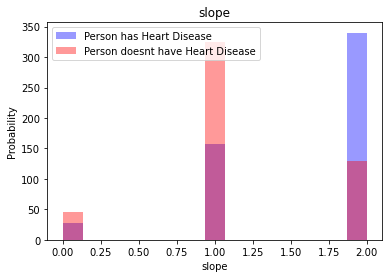

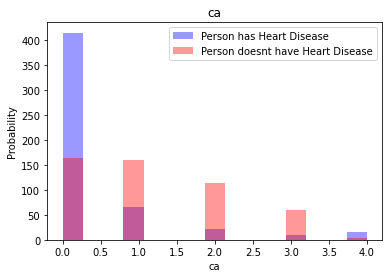

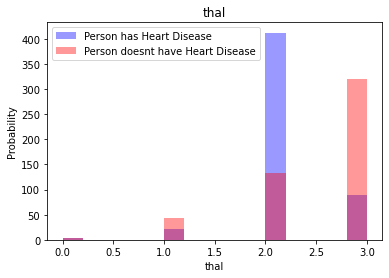

In [9]:
for i in range(len(heart_data.columns[:-1])):
    label = heart_data.columns[i]
    plt.hist(heart_data[heart_data['target'] == 1][label], color = 'blue', label= 'Person has Heart Disease' ,alpha = 0.4, bins=15)
    plt.hist(heart_data[heart_data['target'] == 0][label], color = 'red', label= 'Person doesnt have Heart Disease', alpha = 0.4, bins=15)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

**Separating Features and Targets**

In [10]:
X = heart_data.drop(columns = 'target', axis = 1)
Y = heart_data['target']
print(Y.shape)

print(Y.value_counts())

(1025,)
1    526
0    499
Name: target, dtype: int64


**Seperating training and Testing Data**

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 0)
print(X_train.shape, X_test.shape, X.shape)

(820, 13) (205, 13) (1025, 13)


**Standardizing the Data**

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Creating the Neural Network**

In [13]:
model = keras.Sequential([
    #keras.layers.Flatten(input_shape =(13,)),
    keras.layers.Dense(60, activation = 'relu', input_shape= (13,)),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(40, activation = 'relu'),
    keras.layers.Dense(40, activation = 'relu'),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(2,activation = 'sigmoid' )
])

**Compiling the Network**

In [14]:
model.compile(
        optimizer = 'adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
)

**Training the Neural Network**

In [15]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs = 10)

Epoch 1/10
21/21 [==============================] - 1s 16ms/step - loss: 0.6229 - accuracy: 0.7607 - val_loss: 0.5167 - val_accuracy: 0.7927
Epoch 2/10
21/21 [==============================] - 0s 4ms/step - loss: 0.4177 - accuracy: 0.8232 - val_loss: 0.4127 - val_accuracy: 0.8110
Epoch 3/10
21/21 [==============================] - 0s 4ms/step - loss: 0.3368 - accuracy: 0.8643 - val_loss: 0.3559 - val_accuracy: 0.8415
Epoch 4/10
21/21 [==============================] - 0s 4ms/step - loss: 0.2870 - accuracy: 0.8948 - val_loss: 0.3342 - val_accuracy: 0.8537
Epoch 5/10
21/21 [==============================] - 0s 4ms/step - loss: 0.2410 - accuracy: 0.9162 - val_loss: 0.2879 - val_accuracy: 0.8720
Epoch 6/10
21/21 [==============================] - 0s 4ms/step - loss: 0.2041 - accuracy: 0.9253 - val_loss: 0.2726 - val_accuracy: 0.8780
Epoch 7/10
21/21 [==============================] - 0s 4ms/step - loss: 0.1566 - accuracy: 0.9512 - val_loss: 0.2043 - val_accuracy: 0.9085
Epoch 8/10
21/21 [=

# Visualizing Accuracy and Losses

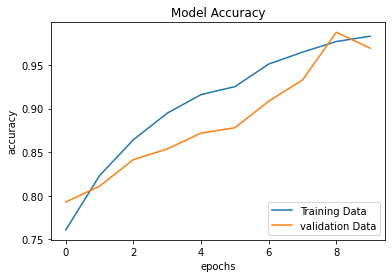

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.legend(['Training Data', 'validation Data'], loc= 'lower right')

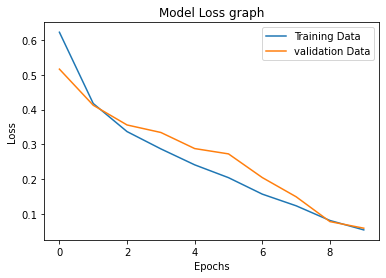

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss graph')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Training Data', 'validation Data'], loc= 'upper right')

**Model Evaluation**

In [18]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

7/7 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9902
0.9902439117431641


In [19]:
Y_pred = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [20]:
print(X_test.shape)
print(X_test)

(205, 13)
[[-1.18272244  0.64895597  1.01170979 ...  0.97028605 -0.74195458
  -0.5144228 ]
 [ 0.37345562 -1.5409366   0.04593327 ...  0.97028605  1.17427458
  -0.5144228 ]
 [ 0.9292335   0.64895597 -0.91984324 ...  0.97028605  1.17427458
   1.10177143]
 ...
 [-1.29387801 -1.5409366   1.01170979 ... -0.6668221  -0.74195458
  -0.5144228 ]
 [ 1.26270023 -1.5409366  -0.91984324 ... -0.6668221   1.17427458
   1.10177143]
 [ 1.81847811 -1.5409366  -0.91984324 ... -0.6668221  -0.74195458
  -0.5144228 ]]


In [21]:
print(Y_pred.shape)
print(Y_pred[0])

(205, 2)
[0.04486107 0.9837804 ]


In [22]:
# Coverting the prediction probability with class labels

In [23]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1]


# Building a predictive System 

In [24]:
#input_data = (68,1,0,144,193,1,1,141,0,3.4,1,2,3)
#print(input_data)

In [25]:
input_data = input('Enter the tuple : ')
input_data = tuple(float(a) for a in input_data.split(","))
print(input_data)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)


Enter the tuple : 52,1,0,125,212,0,1,168,0,1,2,2,3
(52.0, 1.0, 0.0, 125.0, 212.0, 0.0, 1.0, 168.0, 0.0, 1.0, 2.0, 2.0, 3.0)
1/1 [==============================] - 0s 18ms/step
[[0.93217087 0.0599927 ]]


C:\Users\Arka\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [26]:
prediction_label = [np.argmax(prediction)]
print(prediction_label)

[0]


In [27]:
if (prediction_label[0] == 0):
    print('The person does not have Heart Disease')
else:
    print('The person has Heart Disease ')

The person does not have Heart Disease


In [28]:
from sklearn.metrics import accuracy_score

In [29]:
acc = accuracy_score(Y_test, Y_pred_labels)

In [30]:
print(acc)

0.9902439024390244


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                840       
                                                                 
 dense_1 (Dense)             (None, 50)                3050      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 40)                2040      
                                                                 
 dense_4 (Dense)             (None, 40)                1640      
                                                                 
 dense_5 (Dense)             (None, 30)                1230      
                                                                 
 dense_6 (Dense)             (None, 2)                 6

In [34]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk
